In [5]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering 
import sklearn.metrics as sm


In [6]:
#representing the plot
np.set_printoptions(precision=4,suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [7]:
#Reading the data from the CSV file
cars = pd.read_csv('mtcars.csv')
cars.head(3)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [8]:
#naming X-axis and Y-axis and setting column names in CSV file
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
X = cars.ix[:,(1,3,4,6)].values
Y = cars.ix[:,(9)].values

C:\Users\k.vamshiKrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\k.vamshiKrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


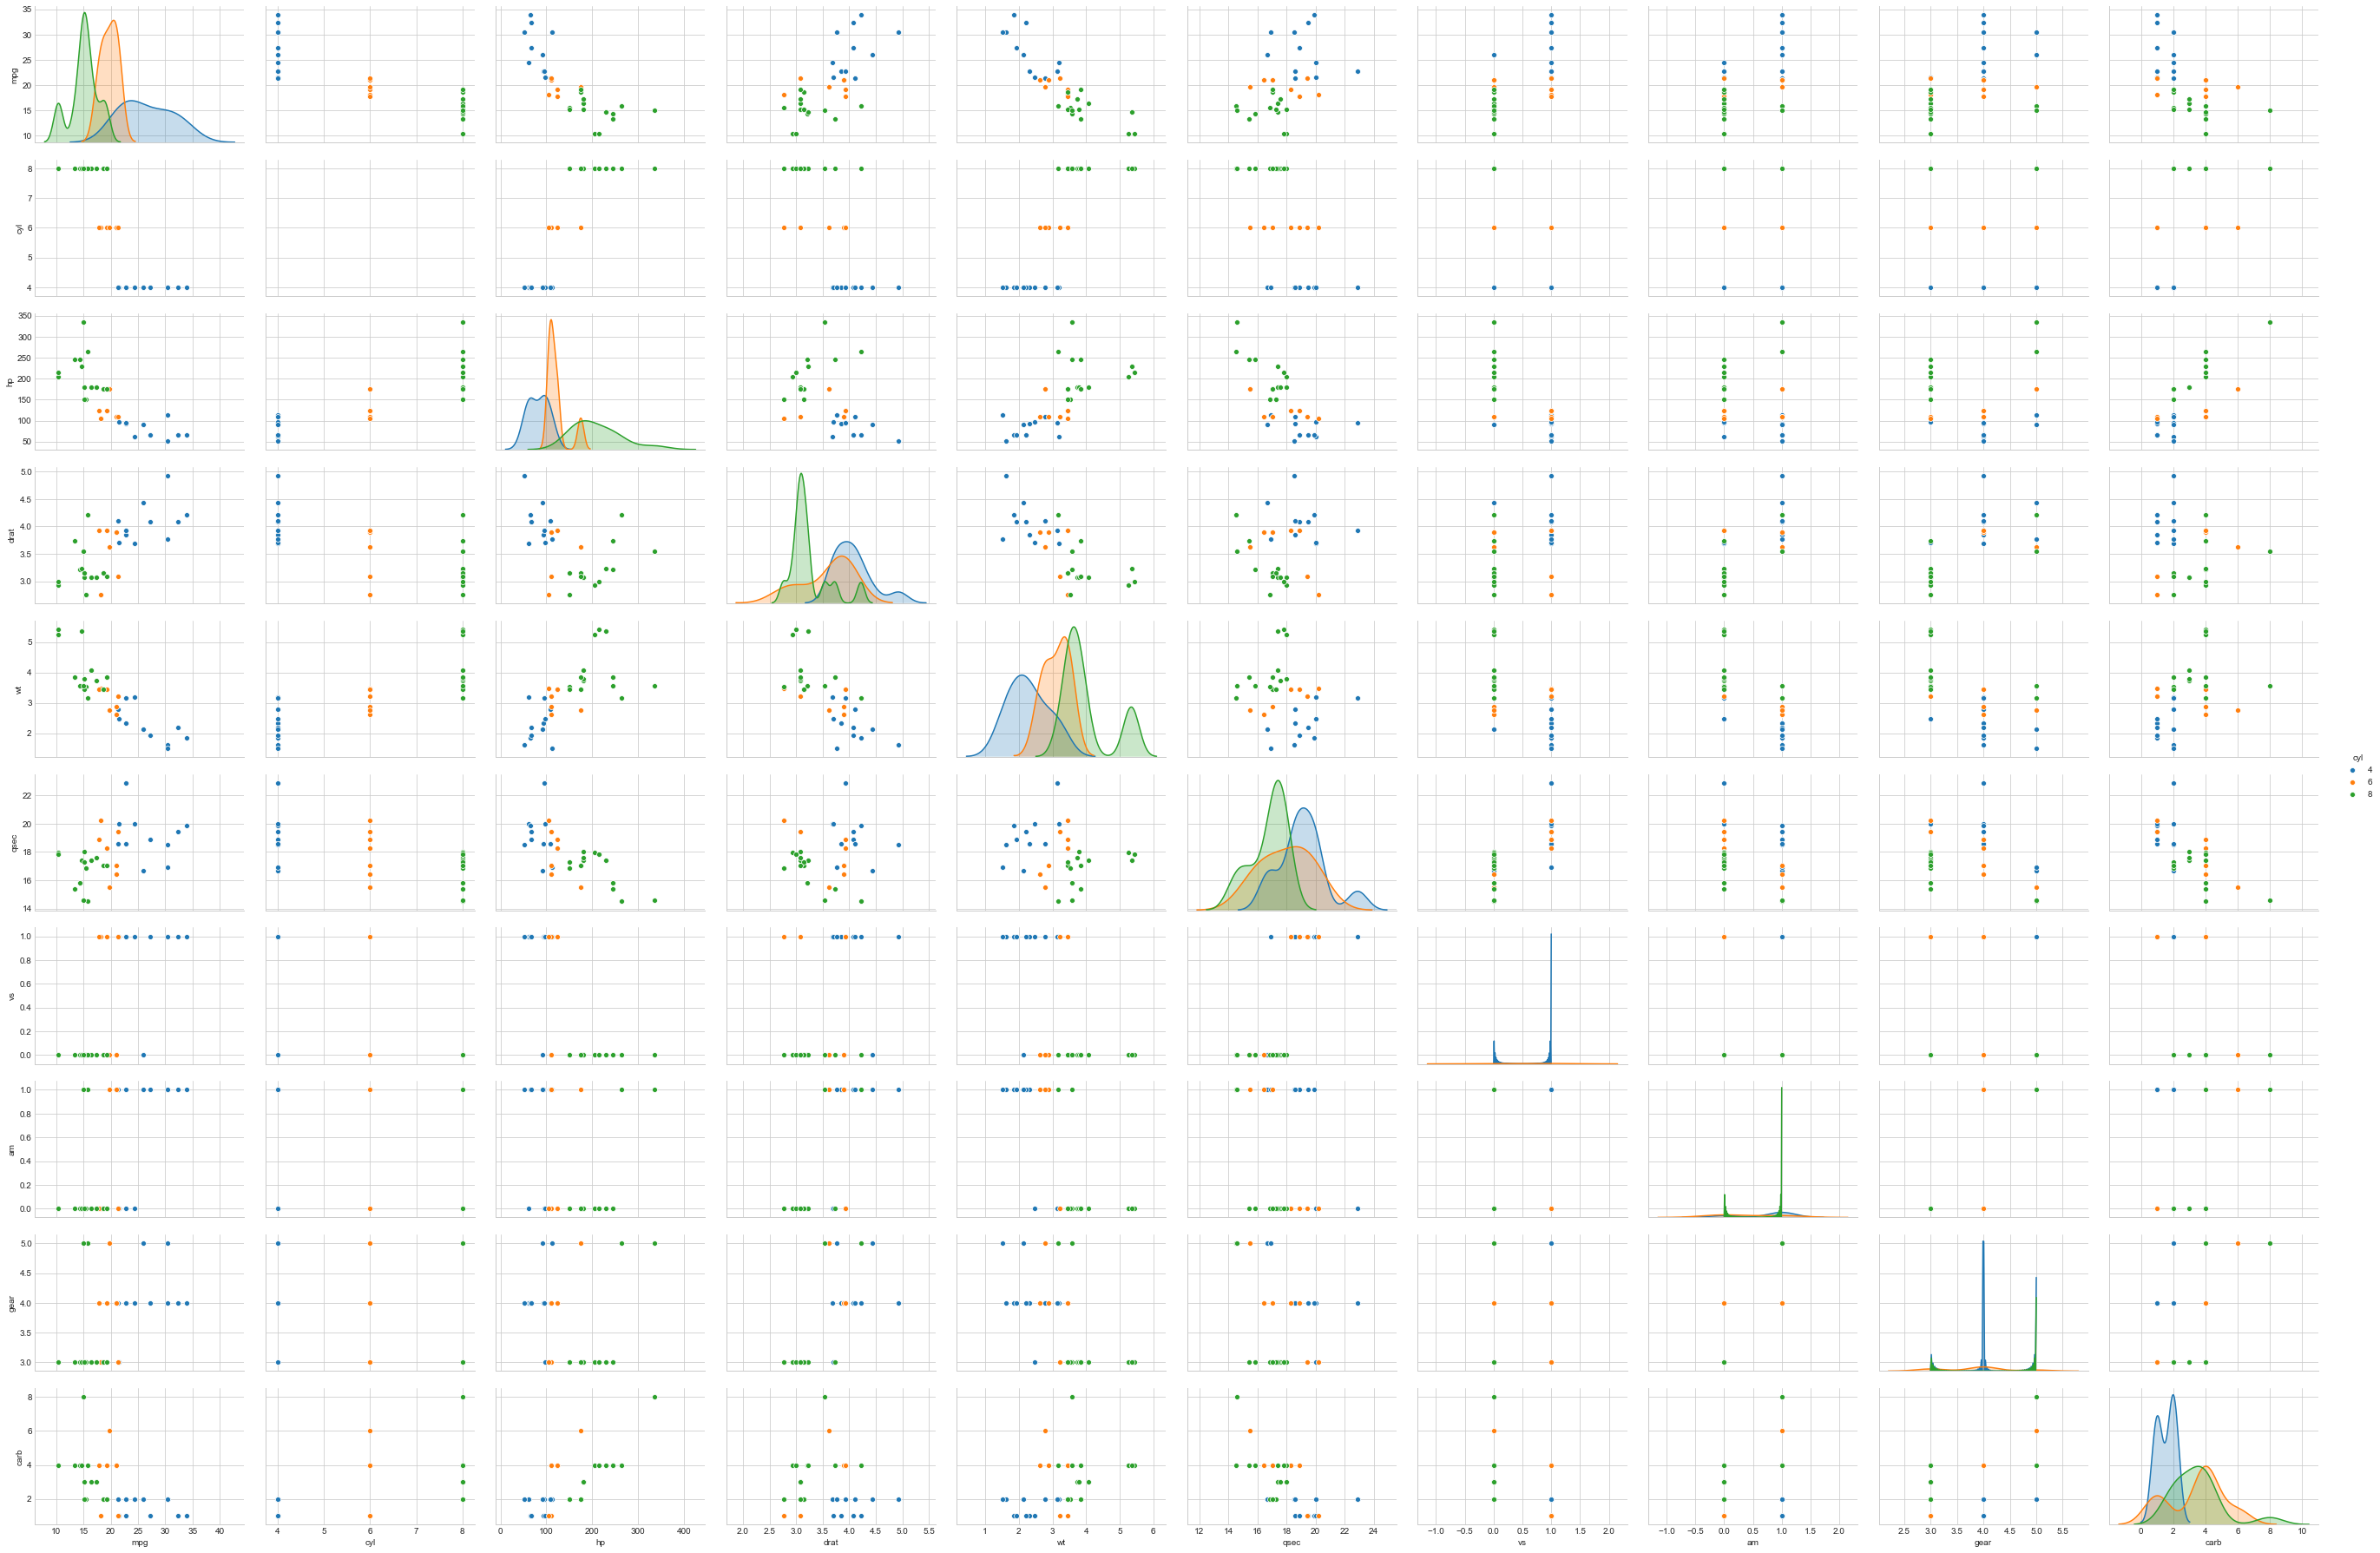

<Figure size 216x288 with 0 Axes>

In [26]:
#individual data  plots 
sb.pairplot(cars.drop('disp', axis=1), hue='cyl', aspect=1.5)
plt.figure(figsize=(3,4))
plt.show()

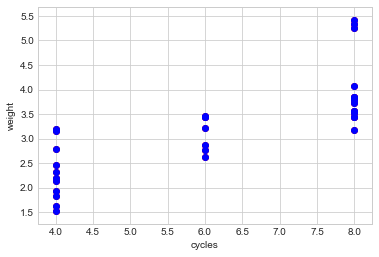

In [21]:
#clustering the data frame 
plt.scatter(cars["cyl"], cars["wt"], color = "red")
plt.scatter(cars["cyl"], cars["wt"], color = "blue")
plt.xlabel('cycles')
plt.ylabel('weight')
plt.show()

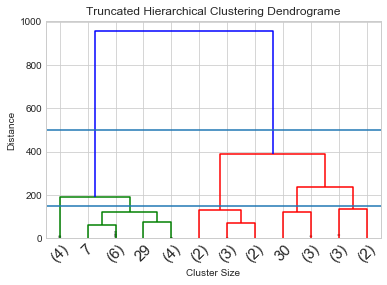

In [10]:
#Truncated Hierarchical clustering dendrogram using agglomerativeClustering
Z = linkage(X,'ward')
dendrogram(Z, truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendrograme')
plt.xlabel('Cluster Size')
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [33]:
#to calculate the Accurecy for  this dataset using euclidean , ward linkage
Hclustering = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage='ward')
Hclustering.fit(X)
sm.accuracy_score(Y,Hclustering.labels_)

0.78125

In [30]:
#to calculate the Accurecy for  this dataset using euclidean ,average linkage
Hclustering = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage='average')
Hclustering.fit(X)
sm.accuracy_score(Y,Hclustering.labels_)

0.78125

In [31]:
#to calculate the Accurecy for  this dataset using manhattan, average linkage
Hclustering = AgglomerativeClustering(n_clusters = 2, affinity='manhattan',linkage='average')
Hclustering.fit(X) 
sm.accuracy_score(Y,Hclustering.labels_)

0.71875